# Module 

In [46]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets

from src.AssignmentTools.xgboost_tools import plot_feature_importances
from src.AssignmentTools.plot_utils import count_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Config

In [18]:
data = datasets.fetch_kddcup99(subset='SA'
                              )

In [19]:
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)
X.columns = data.feature_names

# EDA 

## Target Variable

In [20]:
y[[0]].value_counts()

b'normal.'             97278
b'smurf.'               2376
b'neptune.'              934
b'back.'                  14
b'satan.'                 11
b'ipsweep.'               11
b'teardrop.'               9
b'warezclient.'            8
b'portsweep.'              8
b'pod.'                    3
b'guess_passwd.'           1
b'ftp_write.'              1
b'buffer_overflow.'        1
dtype: int64

In [24]:
y[0].values

array([b'normal.', b'normal.', b'normal.', ..., b'smurf.', b'smurf.',
       b'smurf.'], dtype=object)

In [34]:
map_dict = {}
for value in list(pd.unique(y[0].values)):
#     print(value)
#     print(value == b'normal.')
    if value == b'normal.':
        map_dict[value] = 1
    else:
        map_dict[value] = 0

In [37]:
y['label'] = y.apply(lambda x: map_dict[x[0]], axis=1)
del y[0]

In [38]:
y

,label
0,1
1,1
2,1
3,1
4,1
...,...
100650,0
100651,0
100652,0
100653,0


In [41]:
def labels(ax, df, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=11, xytext=xytext, 
                    textcoords='offset points')

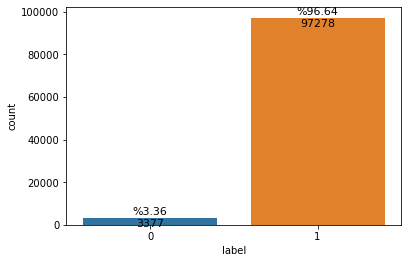

In [47]:
count_plot(y, 'label')

## Feature  

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100655 entries, 0 to 100654
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     100655 non-null  object
 1   protocol_type                100655 non-null  object
 2   service                      100655 non-null  object
 3   flag                         100655 non-null  object
 4   src_bytes                    100655 non-null  object
 5   dst_bytes                    100655 non-null  object
 6   land                         100655 non-null  object
 7   wrong_fragment               100655 non-null  object
 8   urgent                       100655 non-null  object
 9   hot                          100655 non-null  object
 10  num_failed_logins            100655 non-null  object
 11  logged_in                    100655 non-null  object
 12  num_compromised              100655 non-null  object
 13  root_shell    

In [6]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,9,1,0,0.11,0,0,0,0,0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,19,1,0,0.05,0,0,0,0,0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,29,1,0,0.03,0,0,0,0,0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,39,1,0,0.03,0,0,0,0,0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,49,1,0,0.02,0,0,0,0,0


# Model

##  Grid Search

## Evaluation CV 

## Training 

## Importance 